## both tail scenario

## two tails simulation

$$
A =
\begin{bmatrix}
\alpha^+_1 & \cdots & 0 \\
\vdots  & \ddots & \vdots \\
0 &  \cdots & \alpha^+_p \\
\alpha^-_1 & \cdots & 0 \\
\vdots  & \ddots & \vdots \\
0 &  \cdots & \alpha^-_p 
\end{bmatrix}, \quad A \in \mathbb{R}_+^{2p \times p}
$$

$$
K = \rm{diag}(K_1, \cdots, K_p, 1-K_1, \cdots, 1-K_p), \quad K \in \{0,1\}^{2p \times 2p}
$$


The data is generated by:
$$\bm{\bar{X}}=((\bm{I}-KB)^{-1}KA)\circ \bm{N}$$


In [ ]:

import seaborn as sns
import os
# Limit the number of cores used by OpenMP
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["OPENBLAS_NUM_THREADS"] = "2"
os.environ["MKL_NUM_THREADS"] = "2"
os.environ["VECLIB_MAXIMUM_THREADS"] = "2"
os.environ["NUMEXPR_NUM_THREADS"] = "2"
import numpy as np
np.random.seed(49)
import pandas as pd

from helper_simulation import *
from helper_util import *

from tigramite import plotting as tp


import matplotlib.pyplot as plt
from datetime import datetime
current_date = datetime.now().strftime("%Y%m%d")
%matplotlib inline



max_id=get_max("exp_result")
exp_str=""


log_path=f"exp_result/{str(max_id)}.{current_date}.simulationComparisonBothTailsVersion"

logger=get_logger(log_path)


/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


exp_result/7920250222_20250221.simulationComparisonBothTailsVersion/xx.log


In [16]:
pc_alpha=0.005
sparsity=0.3
quantile=1
N=5000
num_nodes = 7 # 图中的节点数


adjacency_matrix,edge_shape = generate_dag_two_tails(num_nodes,edge_probability=sparsity)


# draw graph

the ground truth graph is:


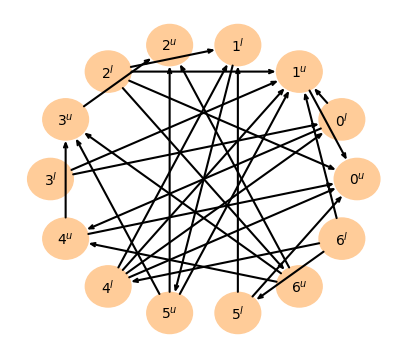

In [17]:


print("the ground truth graph is:")
var_names=np.array([f"${i}^{{u}}$" for i in range(num_nodes)]+[f"${i}^{{l}}$" for i in range(num_nodes)])



draw_graph(arrow_linewidth=3,arrowhead_size=5,label_fontsize=20,figsize=(5,5),**sort_name_and_edge(edge_shape,var_names))

# the scatter plot of the data

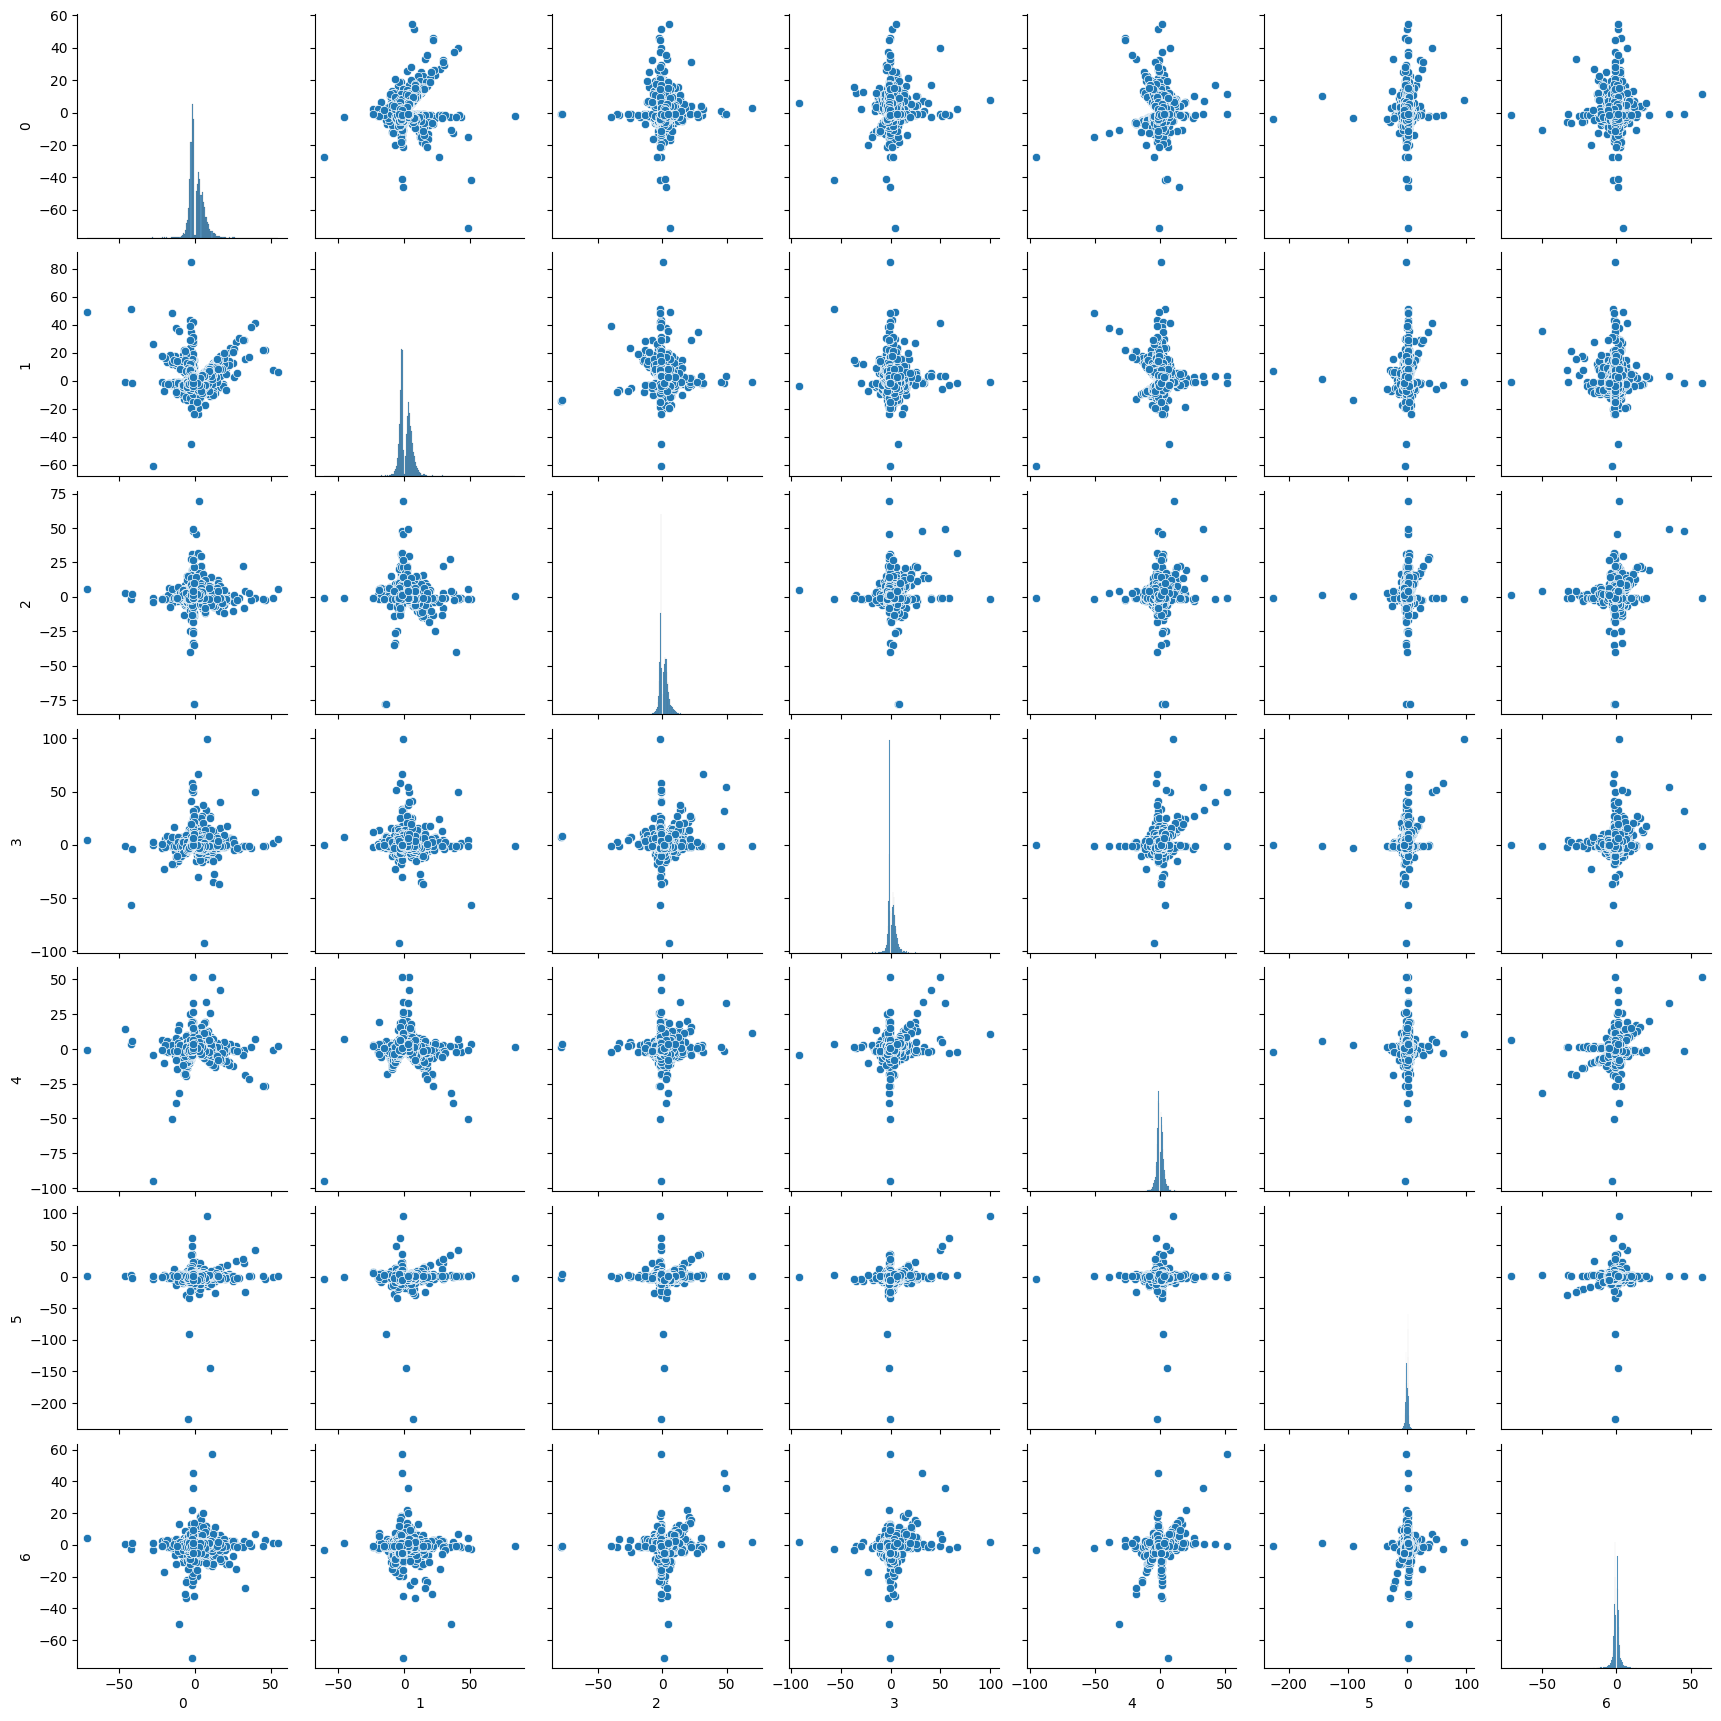

In [18]:




data_df=simulation_both_tail_cross_section(N,adjacency_matrix)

g=sns.pairplot(simulation_both_tail_cross_section(N,adjacency_matrix),corner=False)
# num_vars = data_df.shape[1]
# fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(9, 9))

# for i in range(num_vars):
#     for j in range(num_vars):
#         if i <j:
#             axes[i, j].scatter(data_df.iloc[:, i], data_df.iloc[:, j])
#         else:
#             axes[i, j].scatter([],[])

# plt.tight_layout()
# plt.show()

In [19]:

data_df_bar=expand_data_df(data_df)

In [20]:



resultsThisPaper,_=method_this_paper(data_df_bar,both_tail=True,nodes_number=num_nodes,pc_alpha=pc_alpha,quantile=quantile)



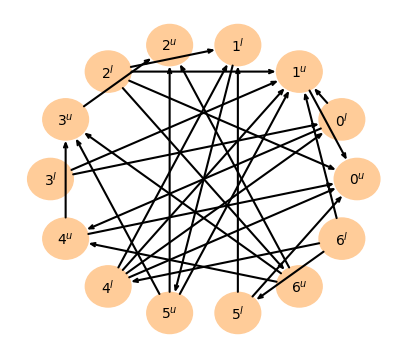

the results of this paper is: (with error rate: 55.6%)


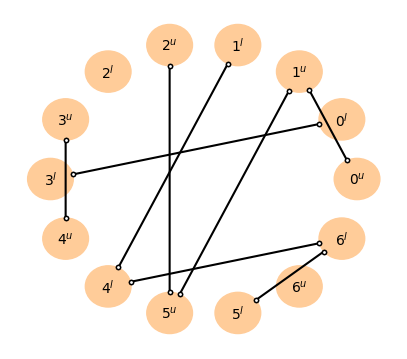

In [21]:



error_rate_this_paper,_=compare_graphs(resultsThisPaper,edge_shape)


draw_graph(arrow_linewidth=3,arrowhead_size=5,label_fontsize=20,figsize=(5,5),**sort_name_and_edge(edge_shape,var_names))

print("the results of this paper is: (with error rate: {:.1f}%)".format(error_rate_this_paper*100))


draw_graph(arrow_linewidth=3,arrowhead_size=5,label_fontsize=20,figsize=(5,5),**sort_name_and_edge(resultsThisPaper,var_names))
